In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense 

from google.colab import files

from sklearn import preprocessing

In [220]:
file = files.upload()


Saving dataset23.csv to dataset23 (2).csv


In [0]:
data_set = pd.read_csv('dataset23.csv')

In [0]:
data =  data_set.drop(['URL','Type','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis = 1)

In [0]:
target = data_set['Type']

In [224]:
data.head(10).isnull().sum()


URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               3
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
dtype: int64

In [0]:
d = data['NUMBER_SPECIAL_CHARACTERS']
mean_value = d.mean(axis = 0)

In [0]:
data['CONTENT_LENGTH'].fillna(value= mean_value ,inplace=True)

In [227]:
data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,iso-8859-1,nginx,263.000000,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,UTF-8,Apache/2.4.10,15087.000000,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.000000,None,None,0,0,0,0,0,0,0,0,0,0.0
3,17,6,ISO-8859-1,nginx,162.000000,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,UTF-8,None,124140.000000,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,18,7,UTF-8,nginx,11.111735,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,18,6,iso-8859-1,Apache/2,345.000000,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.000000,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,20,5,utf-8,nginx/1.10.1,11.111735,None,None,0,0,0,0,2,3,213,146,2,2.0
9,20,5,utf-8,nginx/1.10.1,11.111735,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
le=preprocessing.LabelEncoder()

In [0]:
data['CHARSET']=le.fit_transform(data['CHARSET'])

In [230]:
data.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,4,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,3,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,5,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,17,6,1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,3,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_COUNTRY'])
data['WHOIS_COUNTRY']=le.transform(data['WHOIS_COUNTRY'])

In [232]:
data.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,4,nginx,263.0,29,None,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,3,Apache/2.4.10,15087.0,29,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,5,Microsoft-HTTPAPI/2.0,324.0,29,None,0,0,0,0,0,0,0,0,0,0.0
3,17,6,1,nginx,162.0,42,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,3,None,124140.0,42,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_STATEPRO'])
data['WHOIS_STATEPRO']=le.transform(data['WHOIS_STATEPRO'])

In [234]:
data.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,4,nginx,263.0,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,3,Apache/2.4.10,15087.0,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,5,Microsoft-HTTPAPI/2.0,324.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,17,6,1,nginx,162.0,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,3,None,124140.0,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
data['SERVER'] = data['SERVER'].astype('str')

In [237]:
data.head(5)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,4,201,263.0,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,16,6,3,61,15087.0,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,16,6,5,115,324.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,17,6,1,201,162.0,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,17,6,3,124,124140.0,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['SERVER'])
data['SERVER']=le.transform(data['SERVER'])

In [243]:
type(data['WHOIS_COUNTRY'][1])

numpy.int64

In [0]:
target = target.ravel()

In [0]:
data = np.array(data)
target = np.array(target)

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.2)

In [0]:
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(xtrain[1].shape)), 
    Dense(2, activation = 'softmax')
]) 

In [202]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
adam = keras.optimizers.adam(lr = 0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = adam,
             metrics = ['accuracy'])

In [0]:
ytrain = ytrain.reshape(len(ytrain), 1)

In [211]:
history = model.fit(xtrain, ytrain, epochs=30, verbose = 1)

Epoch 1/30
1424/1424 [==============================] - 0s 38us/step - loss: nan - acc: 0.8757
Epoch 2/30
1424/1424 [==============================] - 0s 48us/step - loss: nan - acc: 0.8757
Epoch 3/30
1424/1424 [==============================] - 0s 38us/step - loss: nan - acc: 0.8757
Epoch 4/30
1424/1424 [==============================] - 0s 36us/step - loss: nan - acc: 0.8757
Epoch 5/30
1424/1424 [==============================] - 0s 37us/step - loss: nan - acc: 0.8757
Epoch 6/30
1424/1424 [==============================] - 0s 33us/step - loss: nan - acc: 0.8757
Epoch 7/30
1424/1424 [==============================] - 0s 33us/step - loss: nan - acc: 0.8757
Epoch 8/30
1424/1424 [==============================] - 0s 38us/step - loss: nan - acc: 0.8757
Epoch 9/30
1424/1424 [==============================] - 0s 35us/step - loss: nan - acc: 0.8757
Epoch 10/30
1424/1424 [==============================] - 0s 36us/step - loss: nan - acc: 0.8757
Epoch 11/30
1424/1424 [==========================

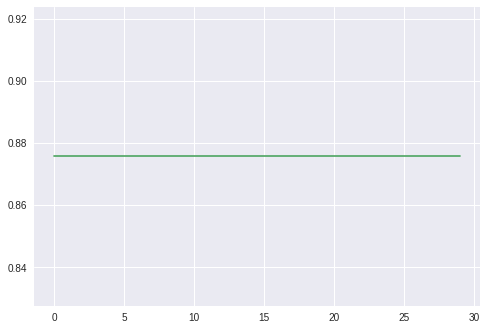

In [206]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])